## 94867 Assignment 2

Anthors: Mandi Liu(mandil), Jingchen Fu(jingchef)

In [20]:
import numpy as np
import pandas as pd

## Compute the population in each state

data source: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/

In [21]:
county = pd.read_csv('covid_county_population_usafacts.csv')

In [22]:
county.head(5)

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [23]:
population = county.groupby('State')['population'].sum()
population.head(5)

State
AK      731545
AL     4903185
AR     3017804
AZ     7278717
CA    39512223
Name: population, dtype: int64

## Extract the positive cases in each state from 2020-03-30 to 2020-12-27 (39 weeks)

In [24]:
from datetime import datetime
start_date = datetime(2020, 3, 30)
end_date = datetime(2020, 12, 27)
date_difference = end_date - start_date
num_weeks = (date_difference.days + 1) // 7
print("Number of weeks:", num_weeks)

Number of weeks: 39


In [25]:
confirmed = pd.read_csv('covid_confirmed_usafacts.csv')

In [26]:
confirmed.head(5)

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [27]:
date_range = pd.date_range(start="2020-03-30", end="2020-12-27").strftime('%Y-%m-%d').tolist()
cols = ['State'] + date_range
selected = confirmed[cols]
selected.drop_duplicates(inplace=True)
selected.head(5)

/var/folders/mg/fljxr9qs2hl4_gfz743f68gh0000gn/T/ipykernel_85252/1930672443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected.drop_duplicates(inplace=True)


,State,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
0,AL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AL,7,7,10,10,12,12,12,12,12,...,3647,3698,3741,3780,3841,3889,3942,3990,3999,4029
2,AL,18,19,23,25,28,29,34,38,42,...,11556,11722,11827,11952,12155,12321,12521,12666,12708,12825
3,AL,0,0,0,0,1,2,2,3,3,...,1318,1330,1336,1336,1363,1383,1390,1396,1398,1406
4,AL,2,3,3,4,4,4,7,7,8,...,1577,1601,1613,1628,1660,1683,1711,1725,1739,1746


In [28]:
any(selected.isnull().sum())

False

In [29]:
state_cases = selected.groupby('State').sum()
state_cases.head(5)

,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
State,,,,,,,,,,,,,,,,,,,,,
AK,119,133,142,147,157,171,185,191,213,226,...,42640,43117,43225,43423,43786,44231,44592,44792,44952,45211
AL,941,997,1106,1270,1534,1632,1840,2003,2197,2497,...,315683,319904,322451,324832,329811,334569,338801,342424,343456,345628
AR,503,560,621,678,732,740,853,924,991,1075,...,197421,200113,201650,203107,205048,207941,211145,213267,213969,214877
AZ,1154,1289,1414,1596,1769,2018,2269,2456,2575,2726,...,442671,448231,453597,453597,453597,453597,453597,453597,453597,453597
CA,16880,18250,19497,20994,22360,23865,24986,26124,27475,28892,...,1975411,2016961,2046614,2067329,2115605,2164469,2209614,2236250,2249217,2283755


## Fit SIR Model to Data

In [30]:
from scipy.integrate import odeint
from scipy import optimize

Text(0, 0.5, 'Observed I(t) / N')

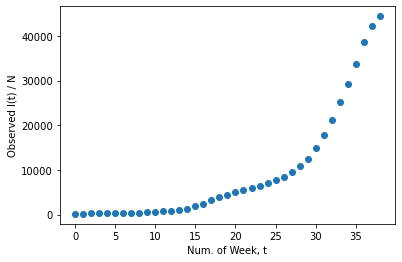

In [31]:
import matplotlib.pyplot as plt
state1 = state_cases.iloc[0, :]
y_total = state1.values
weekly_y_total = [sum(y_total[i:i+7]) / 7 for i in range(0, len(y_total), 7)]
x_total = range(0,39)

plt.figure()
plt.scatter(x_total, weekly_y_total)
plt.xlabel('Num. of Week, t')
plt.ylabel('Observed I(t) / N')

In [32]:
lam, p, gamma = 3, 0.05, 1./14
beta = lam * p

In [33]:
state_cases.index[state_cases.index.get_loc(state_cases.index[0])]

'AK'

[  0.34176414   0.18200021 152.945749  ]


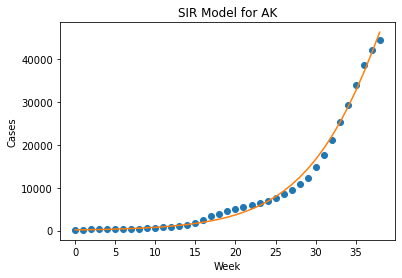

[2.65987812e-01 1.67544045e-01 1.42786174e+04]


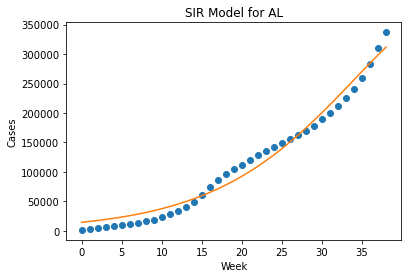

[2.37964511e-01 1.35271764e-01 6.44660095e+03]


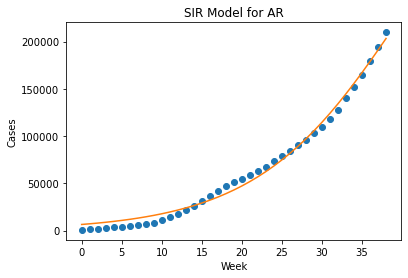

[2.40330715e-01 1.56171272e-01 3.02111673e+04]


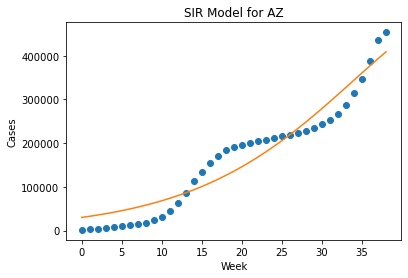

[1.40488520e-01 6.29110950e-02 1.14870428e+05]


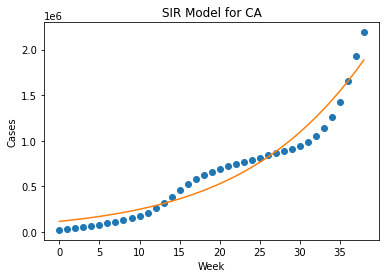

[2.96781699e-01 1.62890241e-01 2.67528719e+03]


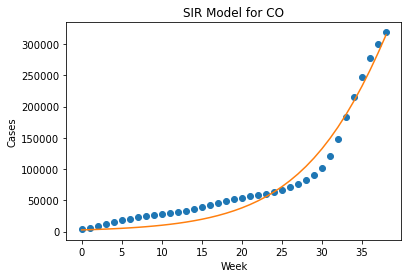

[6.25747657e-02 5.43678368e-03 1.67085089e+04]


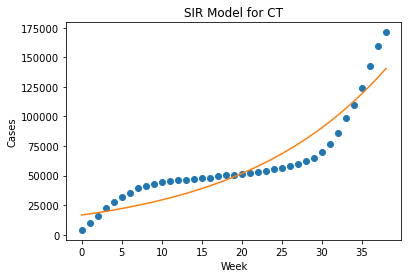

[1.59951264e-01 1.09446441e-01 4.85835908e+03]


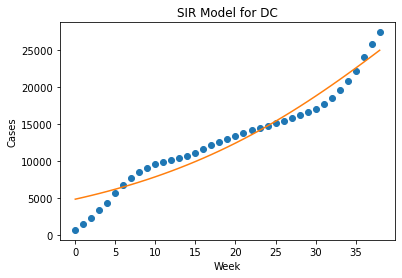

[ 2.11160491e-03 -6.09289443e-02  4.26397495e+03]


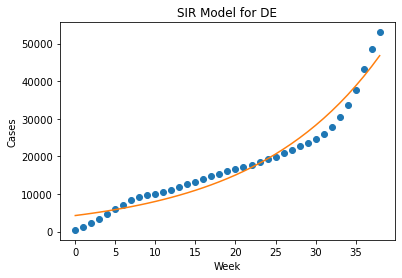

[3.65779850e-01 2.56943138e-01 6.26143161e+04]


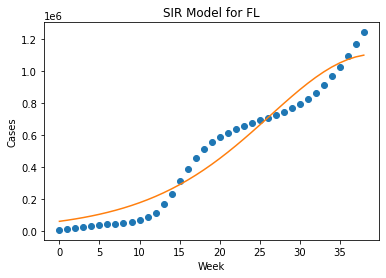

[-2.73006381e-01 -3.57889810e-01  4.02858761e+04]


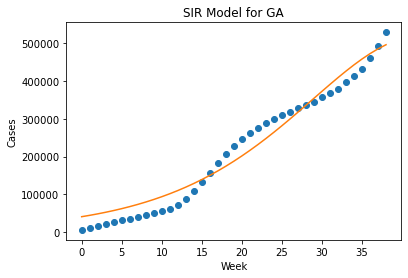

[  1.02865039   0.8678748  266.67798279]


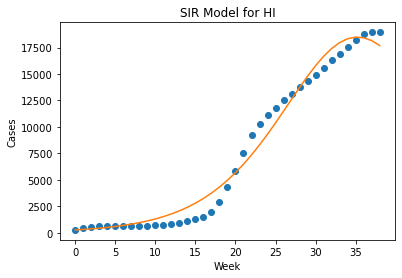

[1.77386918e-01 6.91373621e-02 6.13032365e+03]


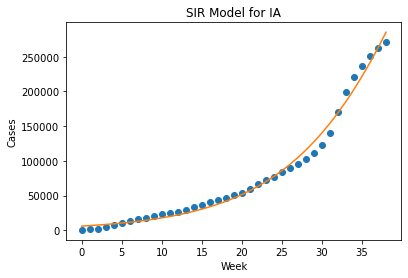

[2.82899152e-01 1.58356087e-01 1.95043347e+03]


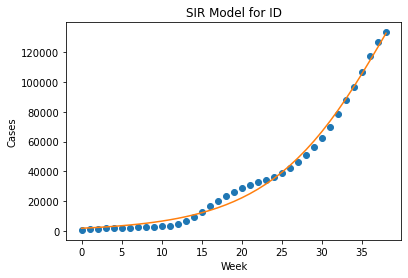

[ 3.86961369e-05 -8.52567888e-02  3.62316838e+04]


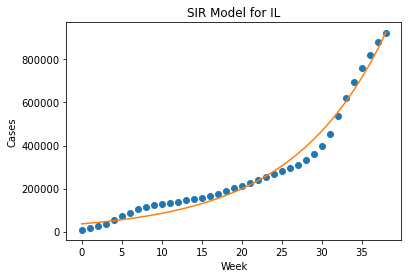

[2.29812783e-01 1.81849028e-01 7.73755364e+04]


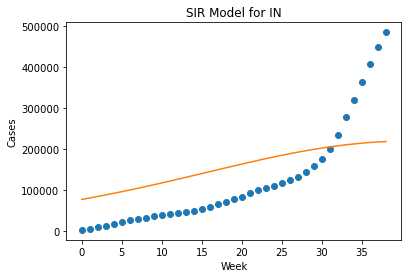

[3.06059970e-01 1.73450340e-01 2.20523421e+03]


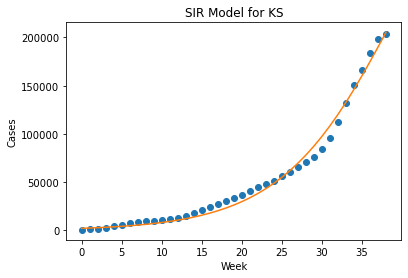

[3.13544284e-01 1.83653033e-01 2.64928208e+03]


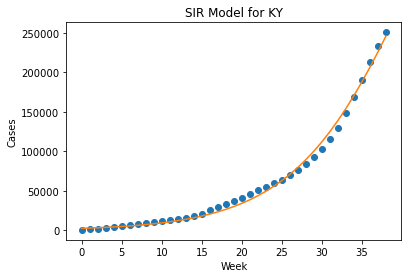

[2.49201114e-01 1.67659278e-01 2.63588585e+04]


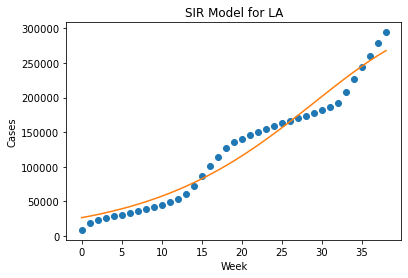

[ 4.57112325e-04 -4.52257255e-02  4.89860503e+04]


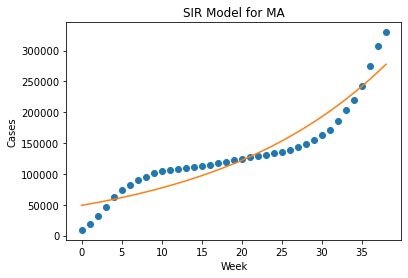

[ 5.68284184e-02 -3.75897704e-04  2.89921136e+04]


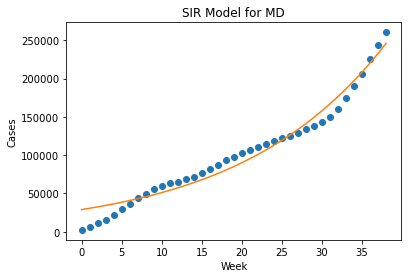

[ 1.16137011e-04 -8.82377316e-02  6.08150301e+02]


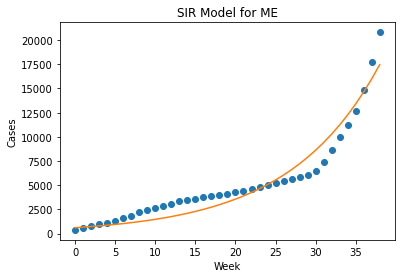

[6.67854854e-01 4.82055280e-01 1.19747046e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


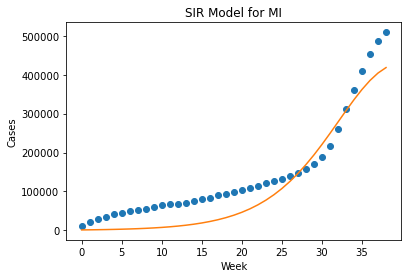

[2.52532109e-01 1.23016819e-01 4.17501994e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


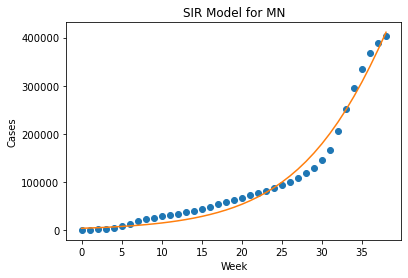

[2.77713897e-01 1.53356137e-01 6.16557536e+03]


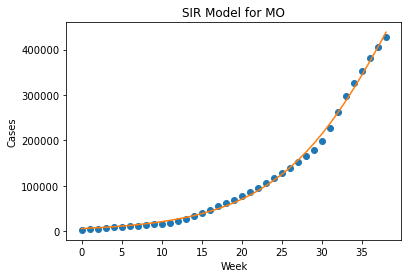

[2.71843103e-01 1.75748780e-01 1.01818329e+04]


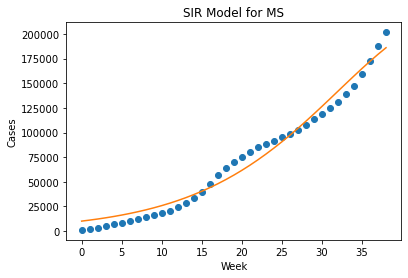

[2.66552741e-01 1.60313431e-01 1.88581140e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


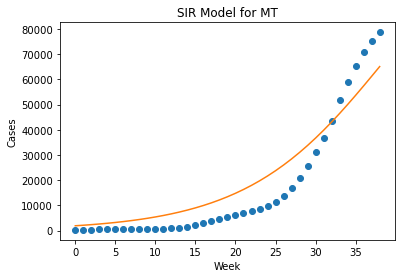

[2.60344769e-01 1.68543287e-01 2.18572816e+04]


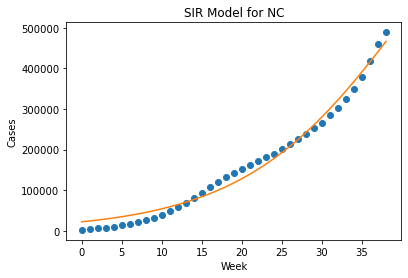

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.36015213e-01 8.98206979e-02 6.19414666e+02]


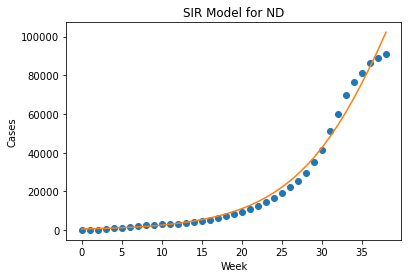

[2.41383435e-01 1.19829125e-01 2.44427235e+03]


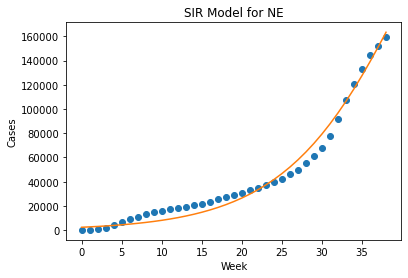

[ 6.59292426e-04 -9.75399166e-02  7.68704250e+02]


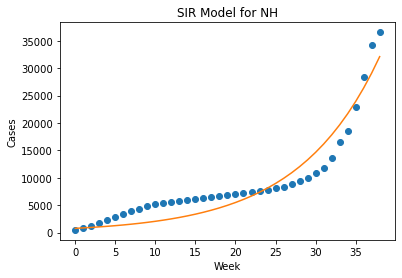

[ 2.98664332e-03 -3.50208519e-02  8.93255917e+04]


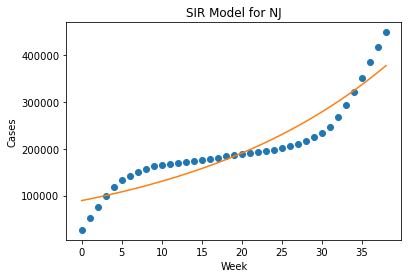

[2.83551507e-01 1.48295928e-01 1.07831506e+03]


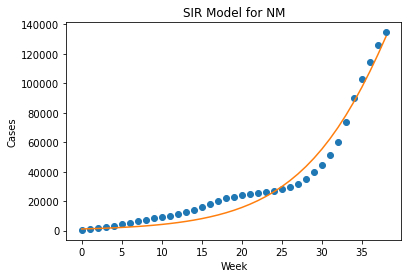

[1.69413303e-01 7.89608978e-02 8.09307774e+03]


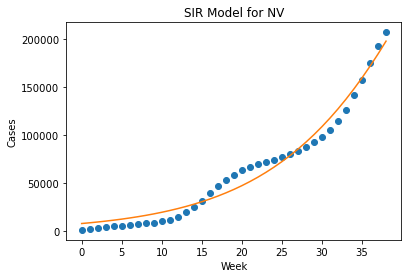

[-6.00237997e-04 -2.94521080e-02  2.41875264e+05]


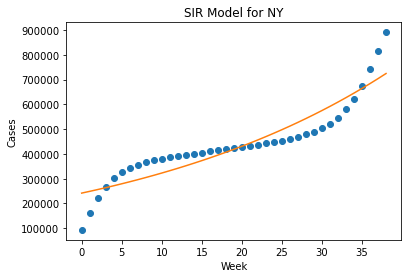

[ 5.45533265e-02 -5.86722319e-02  8.56280829e+03]


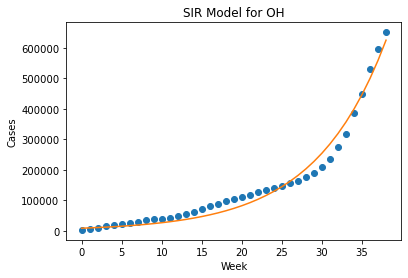

[2.45685236e-01 1.86723753e-01 3.95526978e+04]


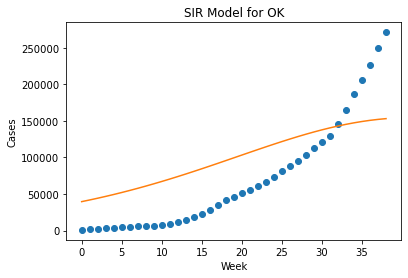

[2.79716793e-01 1.76668915e-01 2.44982822e+03]


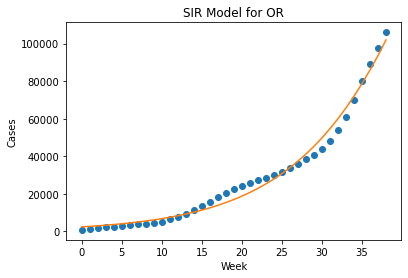

[1.11626001e-01 2.26447220e-02 1.84041467e+04]


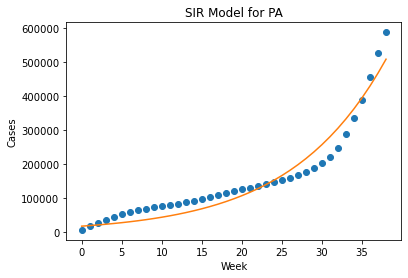

[-1.63311733e-03 -6.96168406e-02  4.82122899e+03]


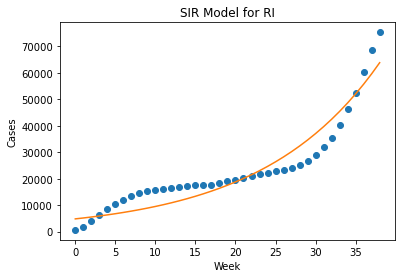

[3.50637085e-01 2.45128614e-01 1.26896988e+04]


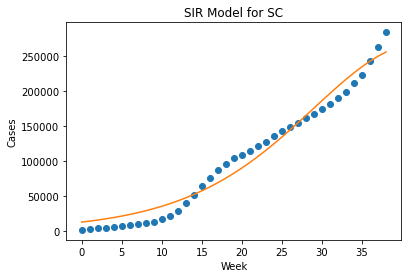

[2.15207174e-01 1.04745947e-01 2.25255492e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


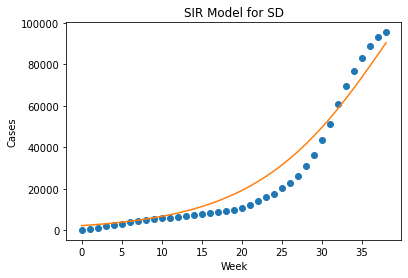

[1.08532826e-01 1.84952736e-02 1.86389231e+04]


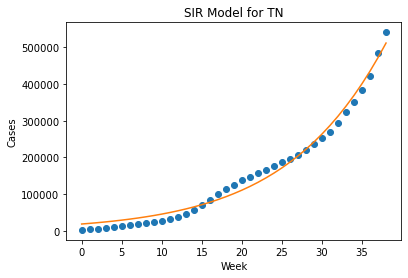

[3.01986401e-01 1.99401961e-01 6.24879709e+04]


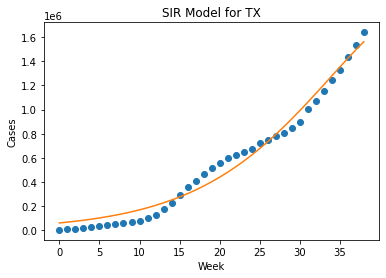

[2.84829193e-01 1.63626682e-01 4.27829976e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


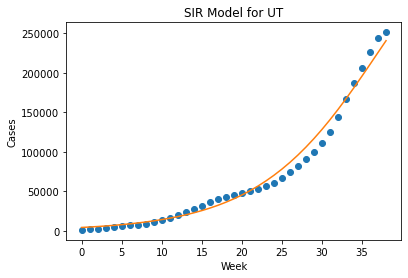

[1.90778438e-01 1.17601054e-01 2.36564048e+04]


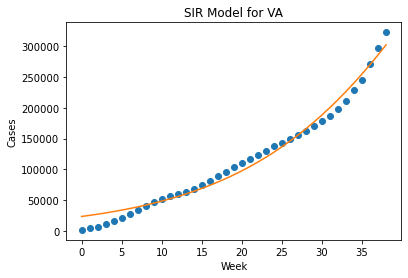

[ 9.14777355e-03 -6.99934959e-02  2.81559687e+02]


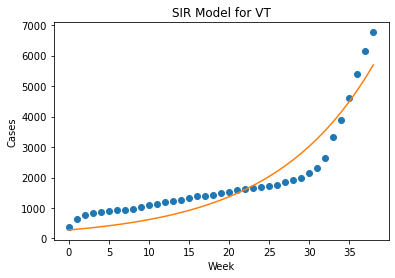

[ 4.63061974e-02 -2.78937697e-02  1.29914527e+04]


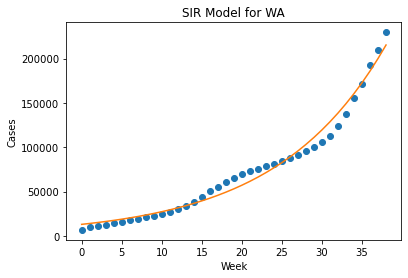

[2.79823602e-01 1.39902180e-01 4.28735134e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


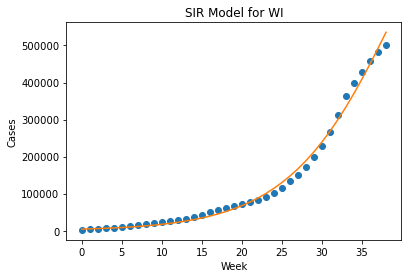

[2.11219227e-01 7.23876889e-02 4.23768418e+02]


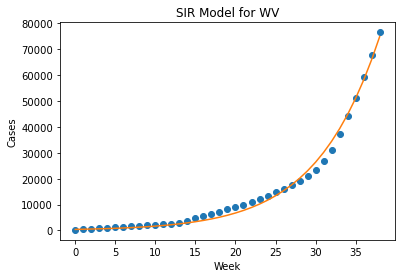

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[ 0.47028281  0.26726907 38.66843347]


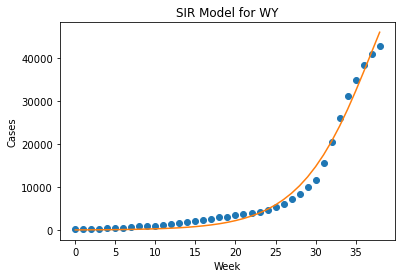

In [34]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def fit_odeint(x, beta, gamma, I0):
    S0 = N - I0
    R0 = 0
    return odeint(deriv, (S0, I0, R0), x, args=(N, beta, gamma))[:,1]

beta_values = {}
gamma_values = {}

for i in range(state_cases.shape[0]):
    state = state_cases.iloc[i, :]
    state_name = state_cases.index[state_cases.index.get_loc(state_cases.index[i])]
    N = population.values[i]
    y_total = state.values / N
    weekly_y_total = [sum(y_total[i:i+7]) / 7 for i in range(0, len(y_total), 7)]
    x_total = range(0,39)

    ydata = np.array(weekly_y_total, dtype=float) * N
    xdata = np.array(x_total, dtype=float)

    popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,(0.3,1/14,0.05*N))
    print(popt)
    beta_values[state_name] = popt[0]
    gamma_values[state_name] = popt[1]

    fitted = fit_odeint(xdata, *popt)
    plt.plot(xdata, ydata, 'o')
    plt.plot(xdata, fitted)
    plt.title(f"SIR Model for {state_name}")
    plt.xlabel("Week")
    plt.ylabel("Cases")
    plt.show()

## fit the SIRV model

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.60113056e-01 2.51293707e-02 3.00977002e+05 1.06814843e-02
 5.22736549e+01]


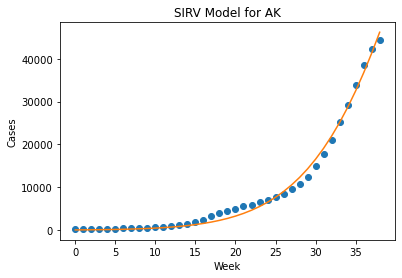

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.13678425e-01 7.10055126e-02 1.62971630e+04 1.05556244e-02
 5.55356920e+02]


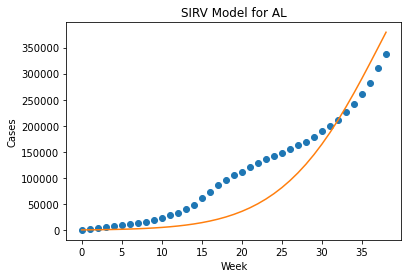

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.99924491e-01 7.14913337e-02 7.84784827e+04 1.00139041e-02
 4.99189472e+02]


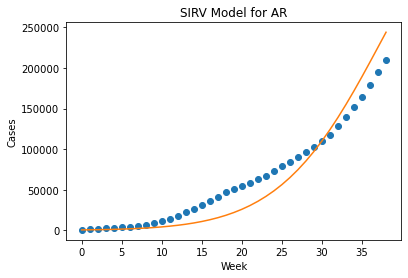

[3.06606528e-01 7.21425702e-02 3.35443003e+05 1.15746801e-02
 1.15159981e+03]


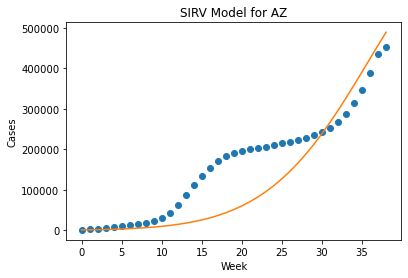

[ 2.94866639e-01  5.59262958e-02 -1.61793108e+09  1.81273621e-02
  1.56509746e+04]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


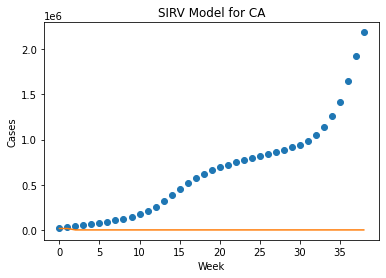

[2.65671911e-01 7.26583338e-02 2.90320075e+05 6.95146562e-03
 9.52233477e+02]


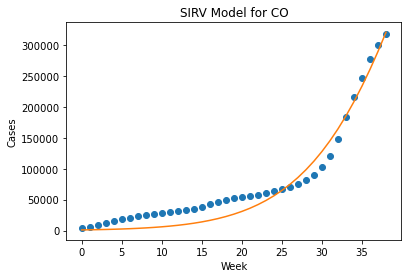

[ 6.49565136e-02  2.05285281e-02  6.03610261e+05 -1.36666447e-02
  1.58333832e+04]


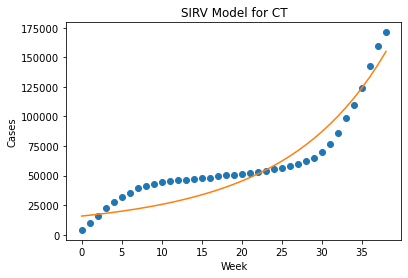

[ 3.17318859e-02 -2.68007749e-02 -7.89383241e+05  2.25627567e-02
  2.40101237e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


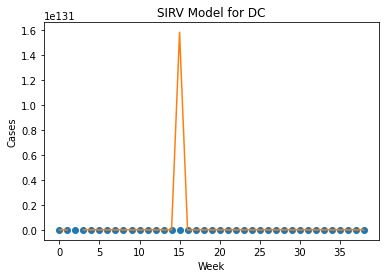

[-3.35889373e-02 -7.56603553e-02  1.34848318e+04  2.58920485e-02
  5.24558117e+03]


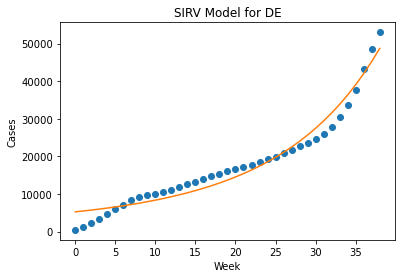

[3.15819334e-01 5.57391698e-02 8.46696506e+05 1.00309502e-02
 1.02308019e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


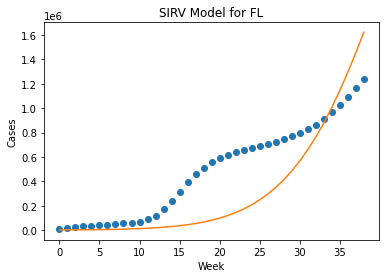

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[1.65301844e-01 4.79172374e-03 4.49641941e+05 2.29035796e-02
 1.85474568e+04]


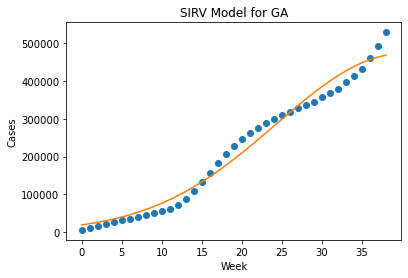

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.94347678e-01 6.97403253e-02 3.44286472e+08 2.22806425e-02
 5.12020228e+01]


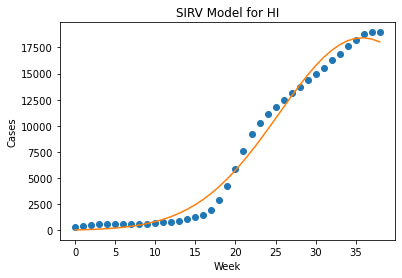

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.91471435e-01 7.06601415e-02 1.32492865e+05 1.07819937e-02
 8.97714349e+02]


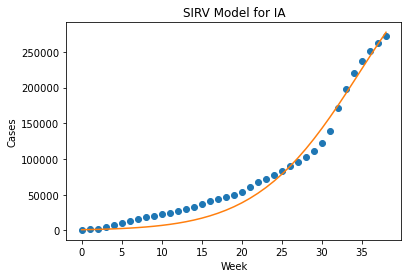

[2.68272222e-01 4.96978136e-02 1.04126134e+05 1.31221431e-02
 5.31583580e+02]


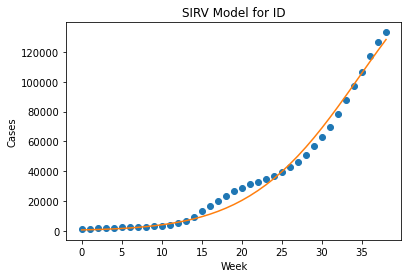

[3.19826175e-01 6.11222260e-02 3.98091267e+05 8.82166897e-03
 5.74559190e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


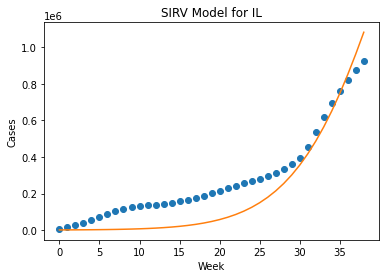

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[ 1.23525054e-01  5.13638530e-02  4.95077577e+05 -1.18609414e-02
  1.24436425e+04]


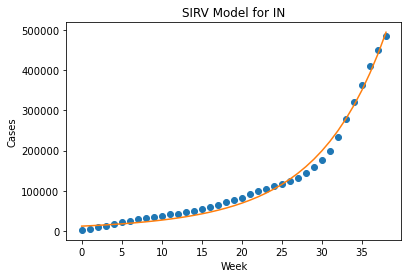

[3.00000000e-01 7.14285714e-02 1.45665700e+05 1.00000000e-02
 5.00000000e+02]


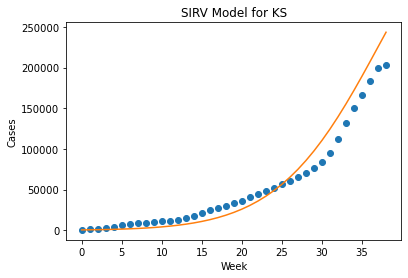

[2.95649724e-01 7.26601644e-02 1.78937934e+06 1.05495336e-02
 6.09224947e+02]


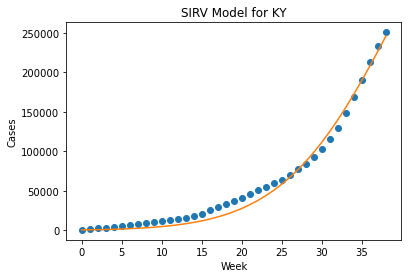

[2.83292103e-01 3.32029992e-02 1.15796395e+05 2.29505045e-02
 2.69430393e+03]


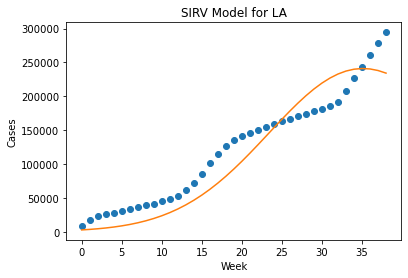

[ 2.75646606e-01  3.49513652e-02 -2.78075934e+06  2.49547128e-02
  1.06486656e+04]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


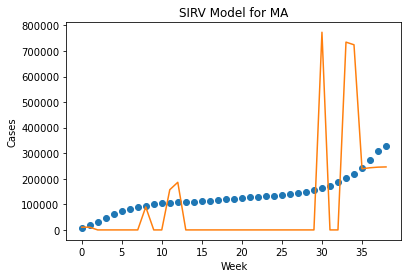

[3.03956298e-01 7.22088085e-02 3.02925305e+05 1.01148669e-02
 5.03640670e+02]


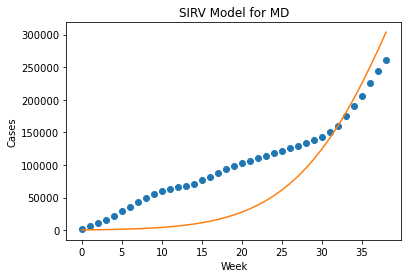

[ 3.70691712e-01  2.11597236e-01 -2.78920486e+01 -3.66749077e-04
  7.15164716e+02]


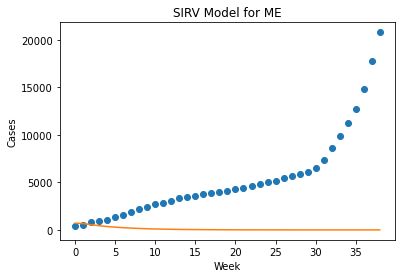

[3.15396350e-01 6.23334450e-02 4.33405463e+05 1.09670258e-02
 5.48658358e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


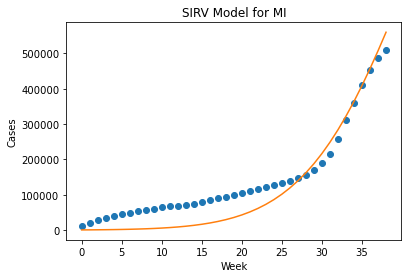

[2.64284158e-01 6.20588025e-02 3.68189647e+05 8.39541703e-03
 1.20499218e+03]


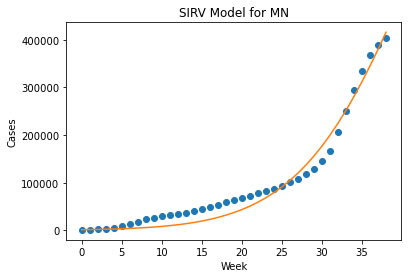

[3.08441596e-01 6.20128649e-02 3.18803182e+05 1.00810831e-02
 5.25343426e+02]


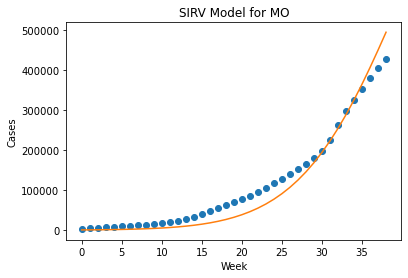

[2.99937008e-01 7.14845299e-02 6.56223064e+04 1.00141110e-02
 4.99559984e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


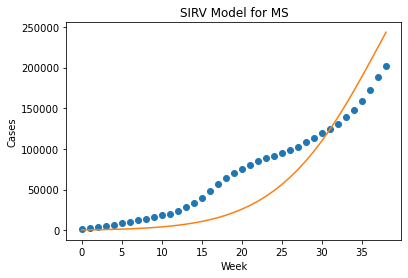

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.78447513e-01 8.06738977e-02 3.69733008e+05 7.61022757e-03
 2.64365813e+02]


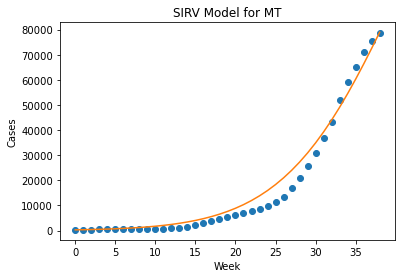

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.07340504e-01 6.61753613e-02 3.10297438e+05 1.09375769e-02
 7.98167454e+02]


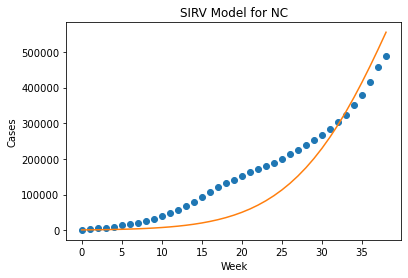

[ 4.88869504e-01  4.58827945e-01  6.95208506e+06 -1.58746106e-02
  1.07327804e+03]


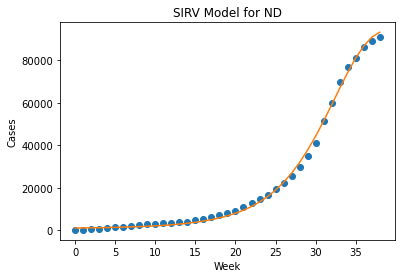

[2.80721057e-01 7.83806996e-02 7.65367755e+04 9.13036636e-03
 6.60642848e+02]


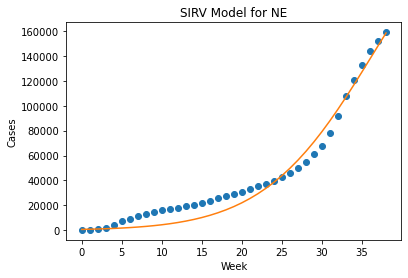

[1.97669434e-01 6.32078575e-02 2.53226983e+04 5.25178099e-03
 4.30660724e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


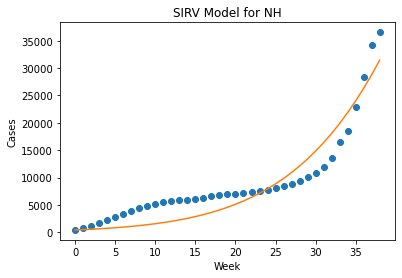

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 3.06781358e-01 -3.07932054e-01  7.75122446e+05  6.26589816e-02
  1.75670501e+02]


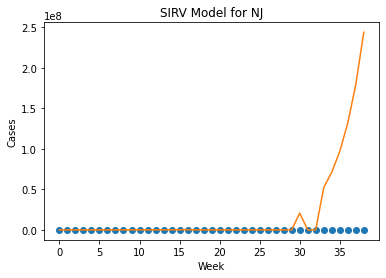

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.87285854e-01 7.73284610e-02 8.00695362e+04 9.80666136e-03
 4.18231043e+02]


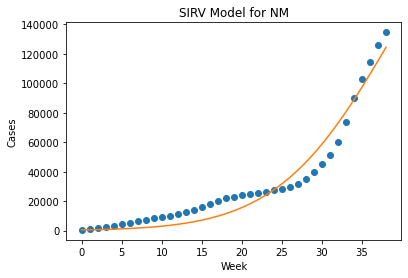

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.67290405e-01 5.80963496e-02 8.04386393e+03 1.43879329e-02
 1.38588906e+03]


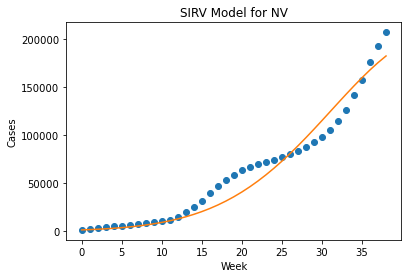

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.55344967e-01 6.87932234e-02 9.26953728e+05 9.40798712e-03
 4.82937808e+02]


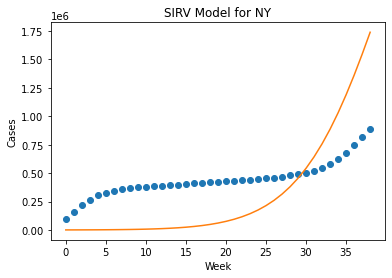

[3.12984608e-01 6.46650474e-02 5.45451637e+05 9.38454236e-03
 5.40580473e+02]


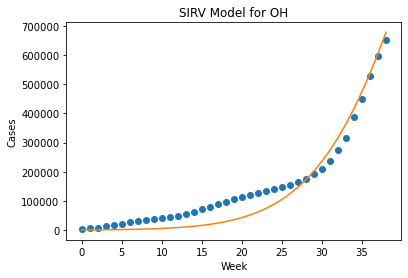

[3.00000005e-01 7.14285741e-02 1.97848554e+05 1.00000019e-02
 5.00000025e+02]


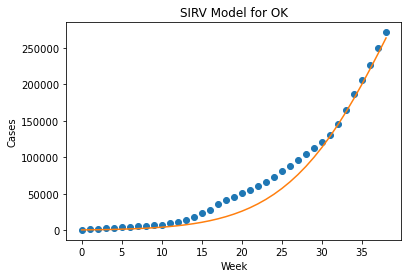

[ 5.20298692e-02 -3.55901986e-02  1.13701681e+05 -4.95909747e-03
  3.13910311e+03]


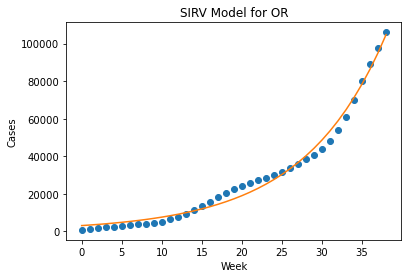

[3.40419613e-01 1.20038857e-01 2.13300198e+07 9.74329884e-03
 1.65431277e+03]


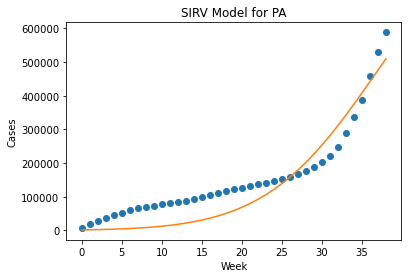

[ 1.87105538e-01  1.36297974e-01  5.59733875e+04 -8.59429297e-03
  4.44992626e+03]


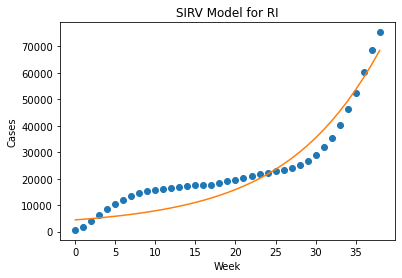

[3.07767409e-01 7.18765169e-02 2.44145711e+05 1.01687033e-02
 5.41462678e+02]


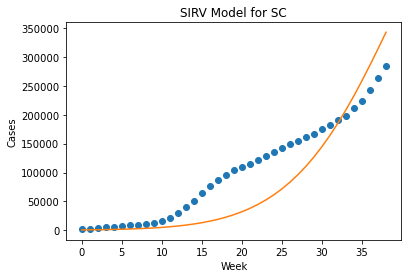

[ 3.93968854e-01  3.15381437e-01  3.71332212e+05 -1.00834418e-02
  1.12417205e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


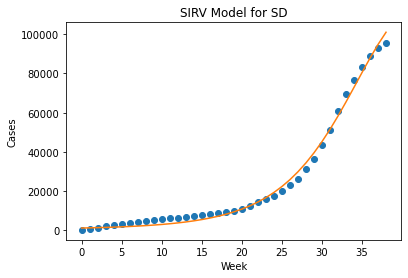

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.09612156e-01 6.79583705e-02 1.61380581e+06 1.05910450e-02
 8.23796000e+02]


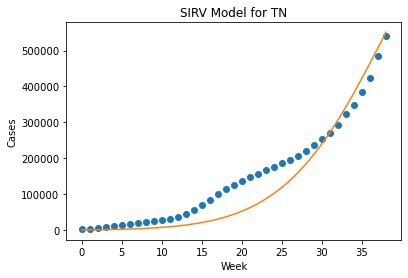

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.35966890e-01 6.75426081e-02 1.66420508e+06 8.24557248e-03
 7.41558235e+02]


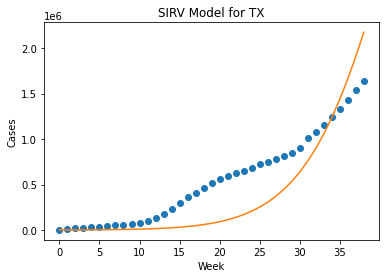

[2.81481044e-01 7.51741732e-02 2.75564896e+07 9.62940977e-03
 9.75676489e+02]


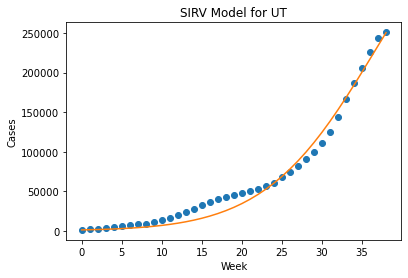

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[ 3.54838465e-02 -5.28727718e-02  5.87119768e+07  2.59999698e-02
  2.04194610e+04]


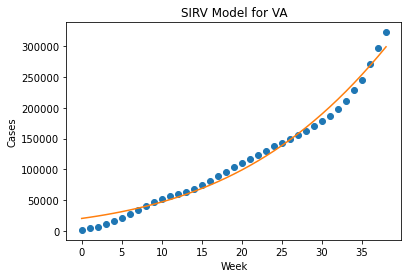

[ 8.24995852e-02  1.17098379e-01  3.97113599e+08 -5.38794869e-02
  1.01630333e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


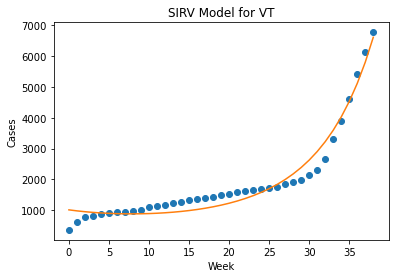

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.04649038e-01 7.59738026e-02 3.58935282e+05 1.12588333e-02
 5.44771096e+02]


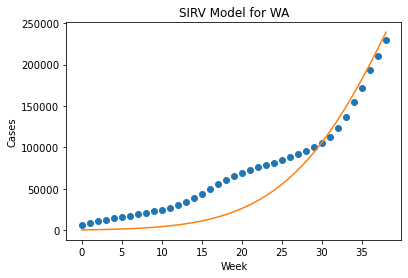

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.01358604e-01 7.11785455e-02 1.86442173e+05 9.82541895e-03
 5.00801319e+02]


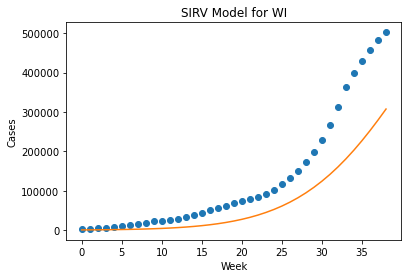

[ 1.37092286e-01  1.91934003e-02  1.56682023e+05 -4.29548203e-03
  5.91103911e+02]


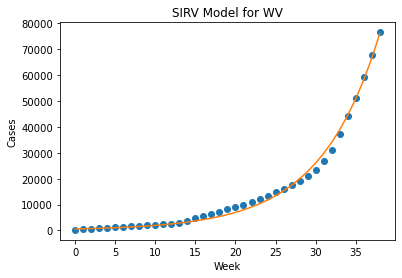

[ 4.21245235e-01  2.76301296e-01  1.90465283e+07 -3.87794482e-03
  1.06088995e+02]


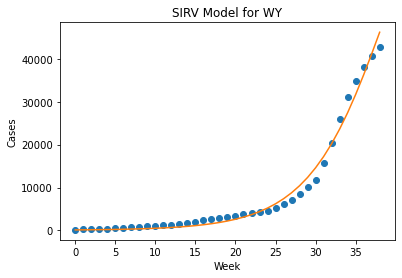

In [35]:
def deriv(y, t, N, beta, gamma, delta, v_rate):
    S, I, R, V = y
    dSdt = -beta * S * I / N - delta * S * V / N # vaccine reduces S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    dVdt = v_rate * N - delta * S * V / N 
    return dSdt, dIdt, dRdt, dVdt

def fit_odeint(x, beta, gamma,delta, v_rate, I0):
    S0 = N - I0
    R0 = 0
    V0 = 0
    return odeint(deriv, (S0, I0, R0, V0), x, args=(N, beta, gamma, delta, v_rate))[:,1]

beta_values = {}
gamma_values = {}

for i in range(state_cases.shape[0]):
    state = state_cases.iloc[i, :]
    state_name = state_cases.index[state_cases.index.get_loc(state_cases.index[i])]
    N = population.values[i]
    y_total = state.values / N

    weekly_y_total = [sum(y_total[i:i+7]) / 7 for i in range(0, len(y_total), 7)]
    x_total = range(0,39)

    ydata = np.array(weekly_y_total, dtype=float) * N
    xdata = np.array(x_total, dtype=float)

    popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,(0.3,1/14,0.05*N,0.01,500))
    print(popt)
    beta_values[state_name] = popt[0]
    gamma_values[state_name] = popt[1]

    fitted = fit_odeint(xdata, *popt)
    plt.plot(xdata, ydata, 'o')
    plt.plot(xdata, fitted)
    plt.title(f"SIRV Model for {state_name}")
    plt.xlabel("Week")
    plt.ylabel("Cases")
    plt.show()

In [36]:
import gurobipy as gp
from gurobipy import GRB

total_vaccine_supply = 100000000  # Initial vaccine supply (100 million)

model = gp.Model("VaccineAllocation_SIRV")

# Fetching the data for states
states = list(beta_values.keys())

# Initialize empty arrays/lists to store data for all states
N = []  # Population for each state
I0 = []  # Initial infected people for each state
S0 = []  # Initial susceptible people for each state
v_rate = 0.01  # Specify the vaccination rate (adjust as needed)
delta = 0.05  # Specify the vaccine effectiveness (adjust as needed)
V0 = 0  # Initial vaccinated population (adjust as needed)

for i in range(state_cases.shape[0]):
    state_population = population.values[i]
    N.append(state_population)
    I0.append(state_cases.iloc[i,0])
    S0.append(state_population - I0[-1])  # Calculate S0 for the current state

# Convert lists to NumPy arrays
N = np.array(N)
I0 = np.array(I0)
S0 = np.array(S0)

# gamma and beta are already correctly fetched as arrays
gamma = np.array(list(gamma_values.values()))
beta = np.array(list(beta_values.values()))

# Decision variables
V = {}
for j in range(len(states)):
    V[j] = model.addVar(lb=0, ub=N[j], vtype=GRB.CONTINUOUS, name=f"V_{states[j]}")


# Set objective function to minimize the total infected population
total_infected = model.addVar(vtype=GRB.CONTINUOUS, name="TotalInfected")

# Calculate total infected people based on the model's equations
for j in range(len(states)):
    total_infected += I0[j] + beta[j] * I0[j] * (S0[j] - V[j]) / N[j] - gamma[j] * I0[j]

model.setObjective(total_infected, GRB.MINIMIZE)


# Add constraints

# Total Vaccine Supply Constraint:
model.addConstr(gp.quicksum(V[j] for j in range(len(states))) == total_vaccine_supply, "TotalVaccineSupply")

# Non-Negative Vaccine Allocation Constraint:
for j in range(len(states)):
    model.addConstr(V[j] >= 0, f"MinVaccinated_{states[j]}")

# Minimum Allocation Constraint for Each State:
min_allocation = 10000  # Minimum allocation for each state (adjust as needed)
for j in range(len(states)):
    model.addConstr(V[j] >= min_allocation, f"MinAllocation_{states[j]}")


# Optimize the model
model.optimize()

# Check if the optimization was successful
if model.status == GRB.OPTIMAL:
    # Retrieve the optimal allocation
    optimal_allocation = [V[j].x for j in range(len(states))]
    
    # Print the optimal allocation for each state
    for j in range(len(states)):
        print(f"Optimal allocation for {states[j]}: {optimal_allocation[j]}")
    
    # Print the objective value (minimum maximum infected)
    print(f"Minimum total infected (Objective Value): {model.objVal}")

else:
    print("Optimization did not converge or encountered an error.")

# Dispose of the model to free up resources
model.dispose()


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[rosetta2])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 103 rows, 52 columns and 153 nonzeros
Model fingerprint: 0x67f81db0
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-06, 1e+00]
  Bounds range     [6e+05, 4e+07]
  RHS range        [1e+04, 1e+08]
Presolve removed 102 rows and 1 columns
Presolve time: 0.00s
Presolved: 1 rows, 51 columns, 51 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0106758e+05   1.000580e+07   0.000000e+00      0s
       1    1.8248279e+05   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.824827913e+05
Optimal allocation for AK: 10000.0
Optimal allocation for AL: 10000.0
Optimal allocation for AR: 10000.0
Optimal allocation for AZ: 10000.0
Optimal allocation for CA: 29419381.0
Optimal allocati